In [1]:
## Class 8 Exercise: Predicting Survival on the Titanic

#This assignment uses data from Kaggle's [Titanic](https://www.kaggle.com/c/titanic/data) competition. `titanic.csv` is in the #repo, so there is no need to download the data from the Kaggle website.

#**Tasks:**

#1. Read `titanic.csv` into a DataFrame.
#2. What is the null accuracy rate for predicting survival? (recall this means the probability of choosing the largest unique #category, either survived or not)
# 549 /891 == .616
#3. Can you think of some variables that are in the dataset that might contribute to predicting survival of the crash?
#4. Define Pclass and Parch as the features, and Survived as the response.
#5. Split the data into training and testing sets. (Hint: use the train test split modules from sklearn)
#6. Fit a logistic regression model and examine the coefficients to confirm that they make intuitive sense.
#7. Make predictions on the testing set and calculate the accuracy.
#8. Create a confusion matrix and document the model's sensitivity and specificity. (remember you should run metrics on your test #classes!)
#9. Also include Age as a feature, and calculate the testing accuracy. There will be a small issue you'll have to deal with. What #is it? How will you deal with it?
#10. Try to make up a new column (be creative!) that you think might be helpful. For example one student make a column called #"is_married" which was a combination of SibSp and the name column and include this new column.
#11. In any of your models, were you able to beat the null accuracy rate?


#Always remember to fit your model on the training data and run metrics on the test set.


import pandas as pd


In [17]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/sfdat22/master/data/titanic.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [18]:
feature_cols= ['Pclass', 'Parch']
x = titanic[feature_cols]
y = titanic['Survived']

In [31]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('Pclass', -0.77693188624943532), ('Parch', 0.21657907971421769)]

In [30]:
#below shows the likelihood of survival if you are in class 3 and have 0 children/parents on board
logreg.predict_proba([3,0])

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.76618482,  0.23381518]])

ValueError: x and y must be the same size

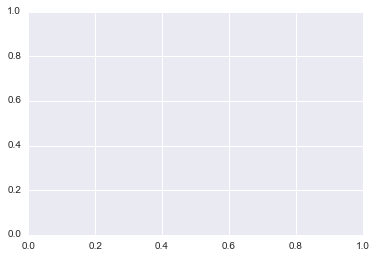

In [33]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train)
